In [164]:
#7주차 과제 - 농어의 길이,  높이,  폭으로 무게를 예측하는 최적의  머신러닝 모델을 만드시오
#최적의 특성 갯수를 찾으시오(그래프를 그림)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv('perch_full.csv')
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

weight = weight.reshape(-1,1)
df.length
df.info()

df. head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
length    56 non-null float64
height    56 non-null float64
width     56 non-null float64
dtypes: float64(3)
memory usage: 1.4 KB


,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


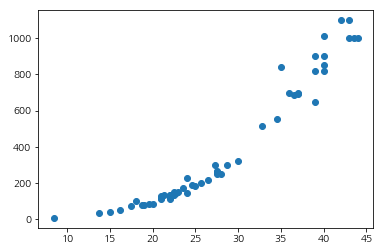

In [163]:
plt.scatter(df.length,weight)


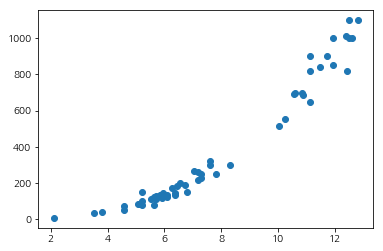

In [165]:
plt.scatter(df.height,weight)


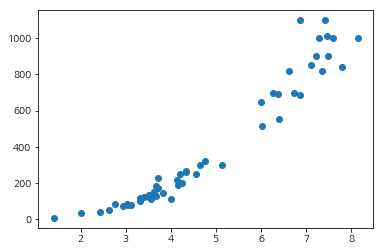

In [166]:
plt.scatter(df.width,weight)


In [167]:
train_input,test_input,train_target,test_target = train_test_split(df,weight,random_state= 42)


lr = LinearRegression()
lr.fit(train_input, train_target)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9559326821885706
0.8796419177546366


In [128]:
print(lr.coef_)
print(lr.intercept_)

weight=pd.DataFrame(weight, columns = ['weight']) #무게 데이터를 넘파이배열 -> 데이터 프레임으로 변환

df2 = pd.concat([df,weight],axis = 1) #-> 데이터프레임 가로로 합치기
print(df2.head())
corr = df2.corr(method = 'pearson') # 상관계수 분석 피어슨 방식계수 분석 피어슨 방식
corr # 상관계수는 셋 다 매우 높다. 그 중 height가 weight와 연관성이 높은걸 볼 수 있다.

[ 9.07538153 69.46401443 38.00385678]
-599.1708082981099
   length  height  width  weight
0     8.4    2.11   1.41     5.9
1    13.7    3.53   2.00    32.0
2    15.0    3.82   2.43    40.0
3    16.2    4.59   2.63    51.5
4    17.4    4.59   2.94    70.0


,length,height,width,weight
length,1.000000,0.985620,0.974574,0.958656
height,0.985620,1.000000,0.982843,0.968413
width,0.974574,0.982843,1.000000,0.963924
weight,0.958656,0.968413,0.963924,1.000000


In [151]:
poly = PolynomialFeatures(degree =2 , include_bias = False) # 데이터양 늘리기. 
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)


lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

print(lr.coef_)
print(lr.intercept_) # -599에서 124라는 정상적인 값으로 돌아왔음을 볼 수 있다.

0.9903183436982124
0.9714559911594164
[[  34.80604039  -88.68430232 -184.11606694   -2.2696004     8.74890226
     9.41670602   27.76120631 -119.89306061   93.68198334]]
[124.06521772]


In [129]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [171]:

train_scaled


array([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
        -0.95745849, -0.93942079, -0.94342509, -0.94100107, -0.88757122,
        -0.88399964, -0.89100599, -0.87785292, -0.88311456, -0.88430909,
        -0.8691891 , -0.87259422, -0.87147928, -0.86603533],
       [-0.73842893, -0.75254307, -0.74466913, -0.76472563, -0.7717585 ,
        -0.77238267, -0.7747325 , -0.77298293, -0.76716811, -0.76291014,
        -0.76770896, -0.77117372, -0.7701438 , -0.77242144, -0.77168016,
        -0.7701077 , -0.7710676 , -0.76852551, -0.76268353],
       [-1.11650891, -0.98919391, -0.97371419, -1.02065999, -0.9714645 ,
        -0.97031097, -0.92689165, -0.92331614, -0.91379551, -0.92715994,
        -0.90484569, -0.90818436, -0.88325413, -0.88524768, -0.88320326,
        -0.86212687, -0.8626609 , -0.85882187, -0.85087284],
       [-1.26544951, -1.20148364, -1.07678447, -1.11008743, -1.0794873 ,
        -1.04481394, -1.04749571, -1.01503633, -0.97401432, -0.97797552,
        -0.962

In [152]:
from sklearn.linear_model import Ridge
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

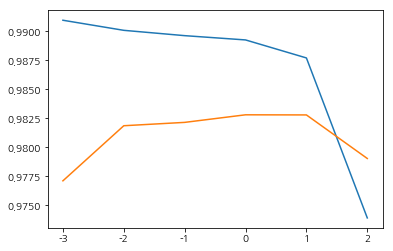

0.9876984476491449
0.9827901012337936


In [153]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
ridge = Ridge(10)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


ValueError: x and y must be the same size

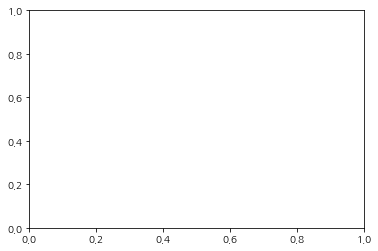